In [444]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math 

In [445]:
item_training_data=pd.read_csv('/content/The Checked Shirt (White).csv')

In [446]:
item_training_data.head()

,Unnamed: 0,Date,Price,Volume
0,0,2017-08-03,5.001,354
1,1,2017-08-04,7.252,174
2,2,2017-08-05,8.038,134
3,3,2017-08-06,8.875,97
4,4,2017-08-07,4.792,215


In [447]:
Train_Split=math.floor(0.8* len(item_training_data))
item_training_process=item_training_data.iloc[:Train_Split,2:].values

In [448]:
item_training_process

array([[5.001e+00, 3.540e+02],
       [7.252e+00, 1.740e+02],
       [8.038e+00, 1.340e+02],
       ...,
       [7.900e-02, 2.600e+01],
       [7.000e-02, 4.200e+01],
       [6.400e-02, 5.400e+01]])

In [449]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
item_training_data = scaler.fit_transform(item_training_process)
len(item_training_data)

847

In [450]:
feature_set=[]
labels=[]
for i in range(40,len(item_training_data)):
  feature_set.append(item_training_data[i-40:i,:])
  labels.append(item_training_data[i,0])
  

In [451]:
features_set,labels=np.array(feature_set),np.array(labels)
print(features_set.shape)
print(labels.shape)

(807, 40, 2)
(807,)


In [452]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 2))


In [453]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [454]:
model = Sequential()


In [455]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 2)))


In [456]:
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [457]:
model.add(Dense(units = 1))


In [458]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [459]:
model.fit(features_set, labels, epochs = 70, batch_size = 32)


Epoch 1/70
807/807 [==============================] - 5s 6ms/step - loss: 0.0025
Epoch 2/70
807/807 [==============================] - 3s 4ms/step - loss: 5.8870e-04
Epoch 3/70
807/807 [==============================] - 3s 3ms/step - loss: 5.2669e-04
Epoch 4/70
807/807 [==============================] - 3s 3ms/step - loss: 4.7074e-04
Epoch 5/70
807/807 [==============================] - 3s 4ms/step - loss: 4.5861e-04
Epoch 6/70
807/807 [==============================] - 3s 4ms/step - loss: 4.4717e-04
Epoch 7/70
807/807 [==============================] - 3s 4ms/step - loss: 4.5138e-04
Epoch 8/70
807/807 [==============================] - 3s 3ms/step - loss: 5.2546e-04
Epoch 9/70
807/807 [==============================] - 2s 3ms/step - loss: 6.5825e-04
Epoch 10/70
807/807 [==============================] - 3s 3ms/step - loss: 4.4772e-04
Epoch 11/70
807/807 [==============================] - 3s 4ms/step - loss: 4.7394e-04
Epoch 12/70
807/807 [==============================] - 3s 3ms/step 

In [460]:
item_testing_data=pd.read_csv('/content/The Checked Shirt (White).csv')
item_training_data=pd.read_csv('/content/The Checked Shirt (White).csv')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb34d3dc860>],
      dtype=object)

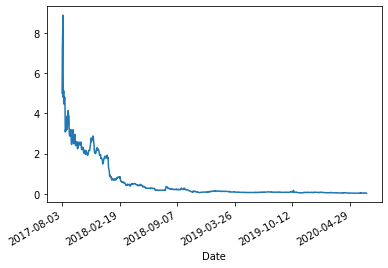

In [461]:
item_testing_data.head()
uni_data=item_testing_data['Price']
uni_data.index=item_testing_data['Date']
uni_data.plot(subplots=True)

In [462]:
item_training_data=item_training_data.iloc[:Train_Split,2:]
item_testing_data=item_testing_data.iloc[Train_Split:,2:]
# item_trianing_data=scaler.transform(item_training_data)
# item_testing_data=scaler.transform(item_testing_data)
print(item_testing_data)

         Price  Volume
847   0.064000      46
848   0.064000      58
849   0.067000      95
850   0.073000      61
851   0.071000      43
...        ...     ...
1054  0.039464      32
1055  0.033448      23
1056  0.032442      29
1057  0.035326      29
1058  0.030330      31

[212 rows x 2 columns]


In [463]:
steam_total_data=pd.concat((item_testing_data,item_testing_data),axis=0)

In [464]:
test_inputs = steam_total_data[len(steam_total_data) - len(item_training_data) - 40:].values
print(len(test_inputs))

424


In [465]:
test_inputs = test_inputs.reshape(-1,2)
test_inputs = scaler.transform(test_inputs)

In [466]:
test_features = []
for i in range(40, 212):
    test_features.append(test_inputs[i-40:i, :])
print(len(test_features))

172


In [467]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 2))
print(test_features.shape)

(172, 40, 2)


In [468]:
predictions = model.predict(test_features)

# print(test_inputs.shape)
predictions=np.append(predictions[:,:1],test_inputs[:172,1:],axis=1)
# print(predictions.shape,type(predictions))
predictions = scaler.inverse_transform(predictions)
predictions=predictions[:,:1]
print(predictions.shape)

(172, 1)


In [470]:
item_testing_data=item_testing_data.iloc[40:,:1]

(172, 1) (172, 1)


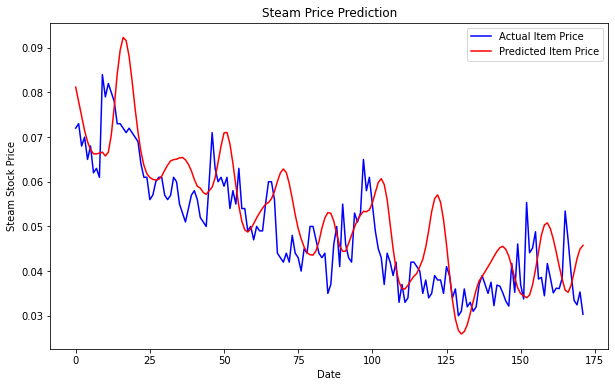

In [472]:
plt.figure(figsize=(10,6))
print(predictions.shape,item_testing_data.shape)
plt.plot(item_testing_data.values.flatten(), color='blue', label='Actual Item Price')
plt.plot(predictions.flatten() , color='red', label='Predicted Item Price')
plt.title('Steam Price Prediction')
plt.xlabel('Date')
plt.ylabel('Steam Stock Price')
plt.legend()
plt.show()

In [471]:
print(item_testing_data)

         Price
887   0.072000
888   0.073000
889   0.068000
890   0.070000
891   0.065000
...        ...
1054  0.039464
1055  0.033448
1056  0.032442
1057  0.035326
1058  0.030330

[172 rows x 1 columns]
